Basic data cleaning and feature exploration

Exploratory data analysis (Answering questions we have of the data)

Basic Data Engineering (Creating a pipeline for tain and test sets)

Model Experimentation and parameter tuning (Linear Regression, Random Forest, XGBoost, MLP)

Feature Engineering

Ensembling

Submitting to the Competition

In [ ]:
#import relevant packages
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML

In [ ]:
#import data
df = pd.read_csv("/content/drive/MyDrive/data/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

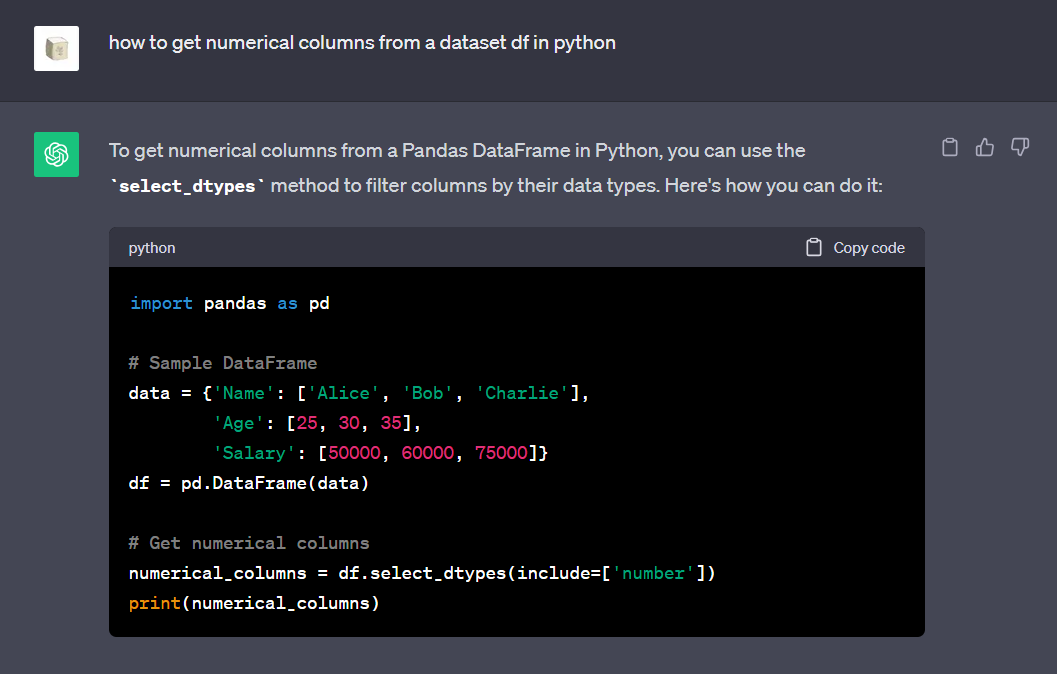

In [ ]:
#getting numerical columns
numerical_features = df.select_dtypes(include=[np.number])

In [ ]:
#Summary statistics for numerical features
numerical_features.describe().T
# what can I do with this information ?
# Well we can check LotArea for instance and look at the average LotArea which might be useful

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
#Categorical features
categorical_features=df.select_dtypes(include=[object])

In [ ]:
#Summary statistics for categorical features
categorical_features.describe().T
# what can i do with this information ?
# we can look thru the counts and find most unique stuff only some houses have and check if prices increase with them included compared to a normal house
# for example the count of PoolQC is only 7 so we can check if the price increases with a Pool or if it is not significant

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


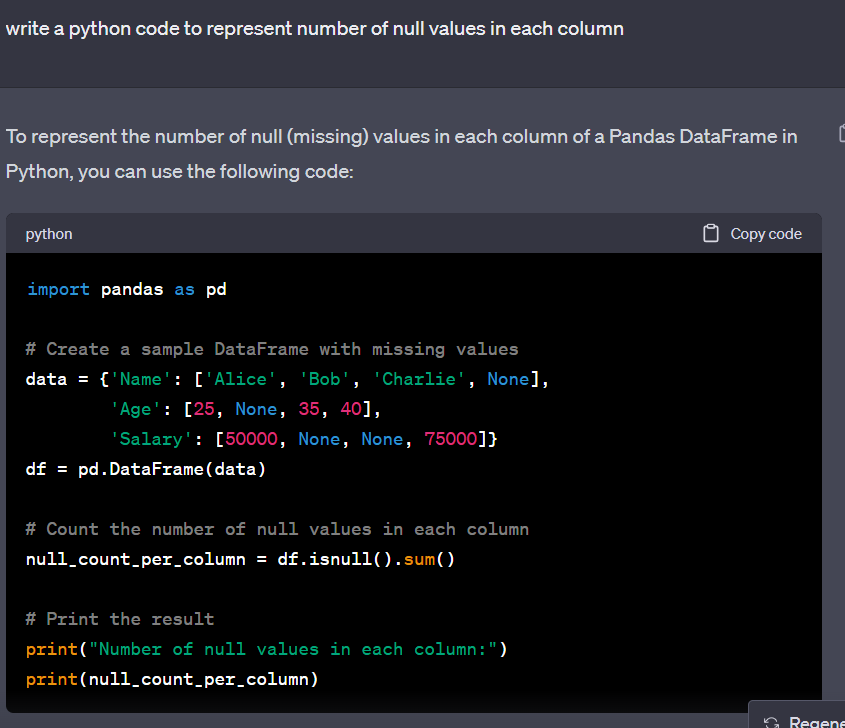

In [ ]:
null_values=df.isnull().sum()

In [ ]:
pd.DataFrame(null_values)

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [ ]:
percentage_null=(null_values/len(df))*100

In [ ]:
pd.DataFrame(percentage_null)
#what can we do with this information ?
# we can see that alley column is almost all null so maybe don't consider alley column for any comparison

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

What questions do we want to ask of the data?

1)Distribution of dwelling types and their relation to sale prices?

2)Does zoning impact sale price?

3)Does street and alley access types effect on sale price?

4)What is the Average sale price by property shape?

5)Is there a Correlation between Property Age and Sale Price

6)Is there a Correlation between Living Area and Sale Price

7)Does price change year to year?

In [ ]:
dwelling_types=df["BldgType"].value_counts()
dwelling_type=pd.DataFrame(dwelling_types)
dwelling_price=df.groupby("BldgType").agg({"SalePrice":"mean"})

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 5 artists>

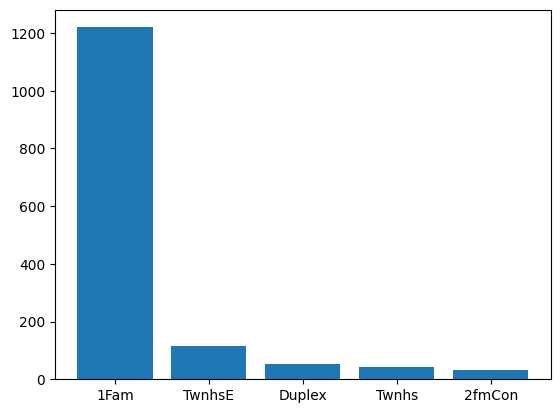

In [ ]:
plt.bar(dwelling_type.index,dwelling_type["BldgType"])

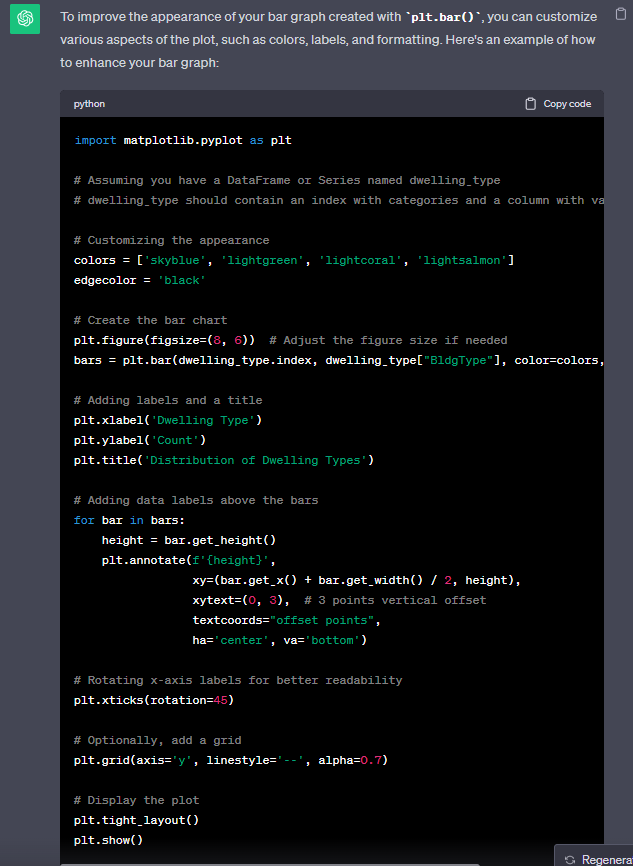

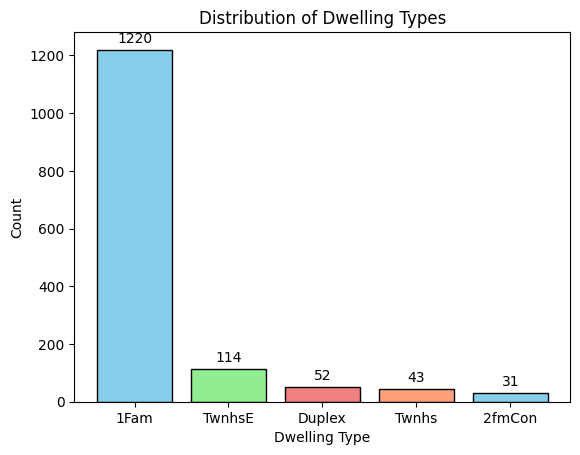

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
edgecolor = 'black'
bars=plt.bar(dwelling_type.index,dwelling_type["BldgType"],color=colors,edgecolor=edgecolor)
plt.xlabel('Dwelling Type')
plt.ylabel('Count')
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.title("Distribution of Dwelling Types");


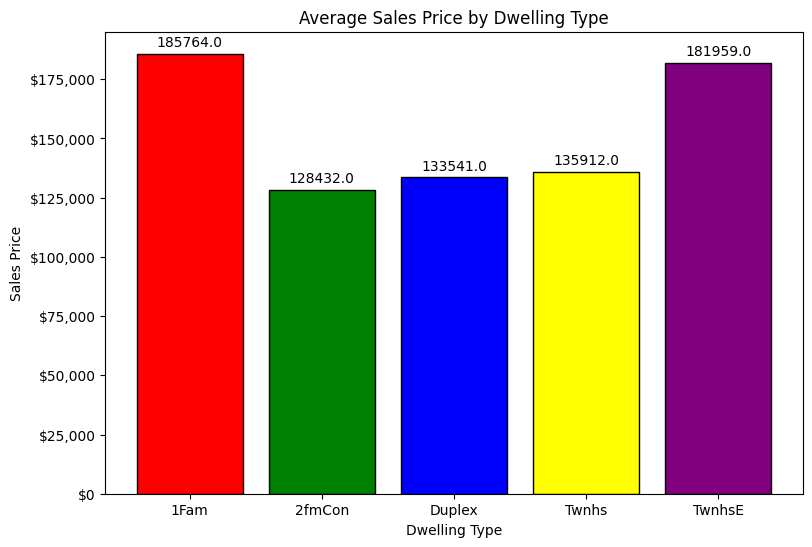

In [ ]:
fig,ax=plt.subplots(figsize=(9,6))
colors = ['red', 'green', 'blue', 'yellow','purple']
edgecolor = 'black'

bars=plt.bar(dwelling_price.index,dwelling_price["SalePrice"],color=colors,edgecolor=edgecolor)
# Adding a y-axis label with a dollar sign
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel('Dwelling Type')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Dwelling Type");

In [ ]:
df["MSZoning"].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [ ]:
Zoning_price=df.groupby("MSZoning").agg({"SalePrice":"mean"})

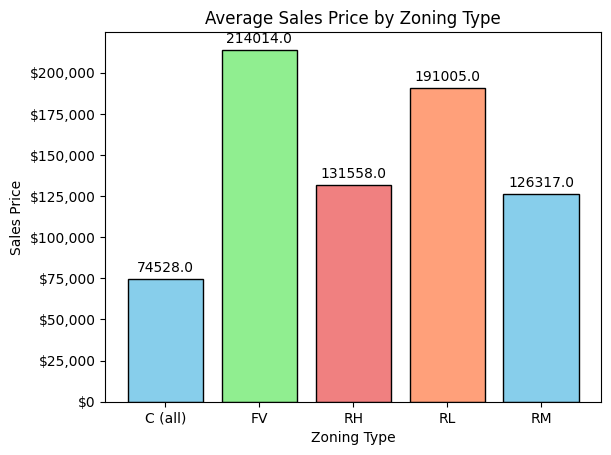

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
edgecolor = 'black'
bars=plt.bar(Zoning_price.index,Zoning_price["SalePrice"],color=colors,edgecolor=edgecolor)
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Zoning Type')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Zoning Type");

In [ ]:
df["Street"].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [ ]:
Street_price=df.groupby("Street").agg({"SalePrice":"mean"})
Alley_price=df.groupby("Alley").agg({"SalePrice":"mean"})

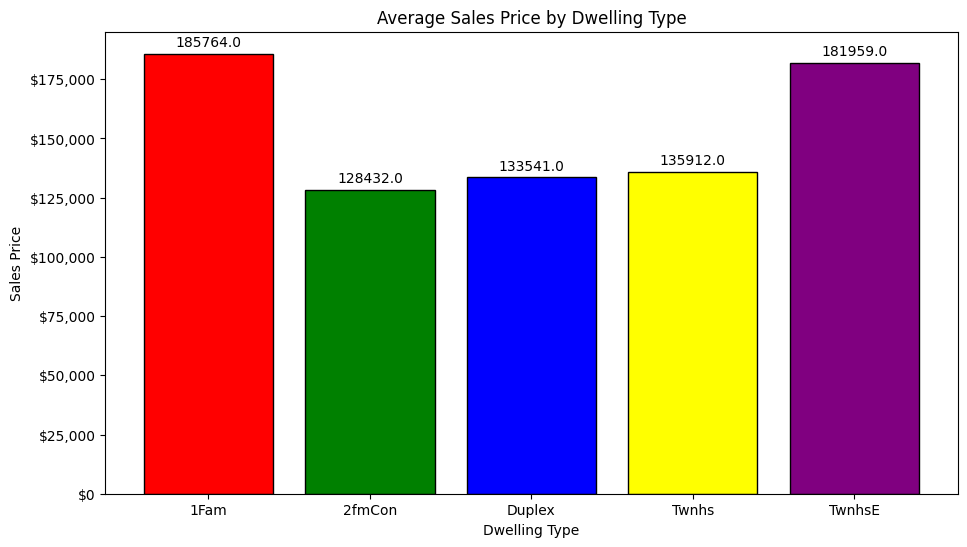

In [ ]:
fig,ax=plt.subplots(figsize=(11,6))
colors = ['red', 'green', 'blue', 'yellow','purple']
edgecolor = 'black'

bars=plt.bar(dwelling_price.index,dwelling_price["SalePrice"],color=colors,edgecolor=edgecolor)
# Adding a y-axis label with a dollar sign
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel('Dwelling Type')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Dwelling Type");

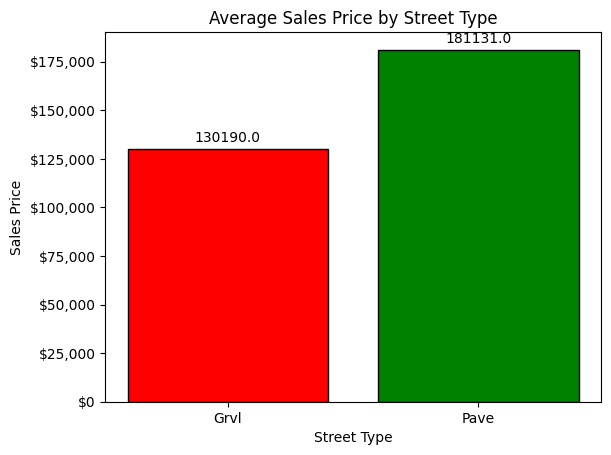

In [ ]:
colors = ['red', 'green']
edgecolor = 'black'

bars=plt.bar(Street_price.index,Street_price["SalePrice"],color=colors,edgecolor=edgecolor)
# Adding a y-axis label with a dollar sign
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel('Street Type')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Street Type");

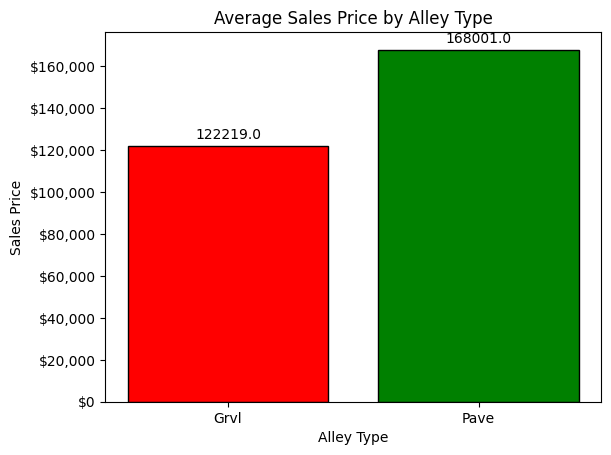

In [ ]:
colors = ['red', 'green']
edgecolor = 'black'

bars=plt.bar(Alley_price.index,Alley_price["SalePrice"],color=colors,edgecolor=edgecolor)
# Adding a y-axis label with a dollar sign
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.xlabel('Alley Type')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Alley Type");

#We can see that for both Alley and Street type, Pave is more ideal

In [ ]:
Shape_price=df.groupby("LotShape").agg({"SalePrice":"mean"})

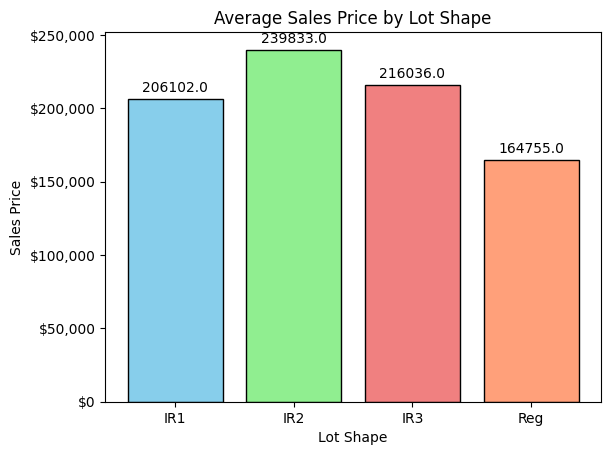

In [ ]:
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
edgecolor = 'black'
bars=plt.bar(Shape_price.index,Shape_price["SalePrice"],color=colors,edgecolor=edgecolor)
plt.gca().yaxis.set_major_formatter('${:,.0f}'.format)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height.round()}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.xlabel('Lot Shape')
plt.ylabel('Sales Price')
plt.title("Average Sales Price by Lot Shape");

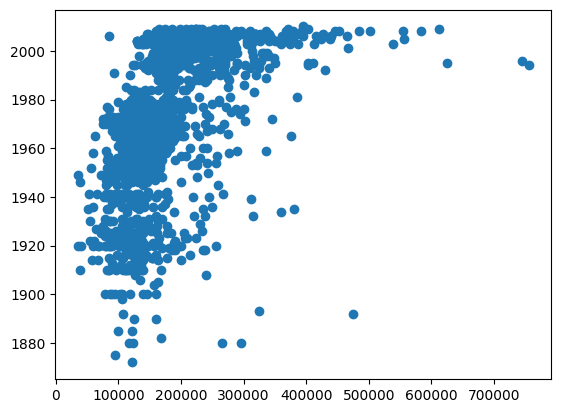

In [ ]:
plt.scatter(df["SalePrice"],df["YearBuilt"])

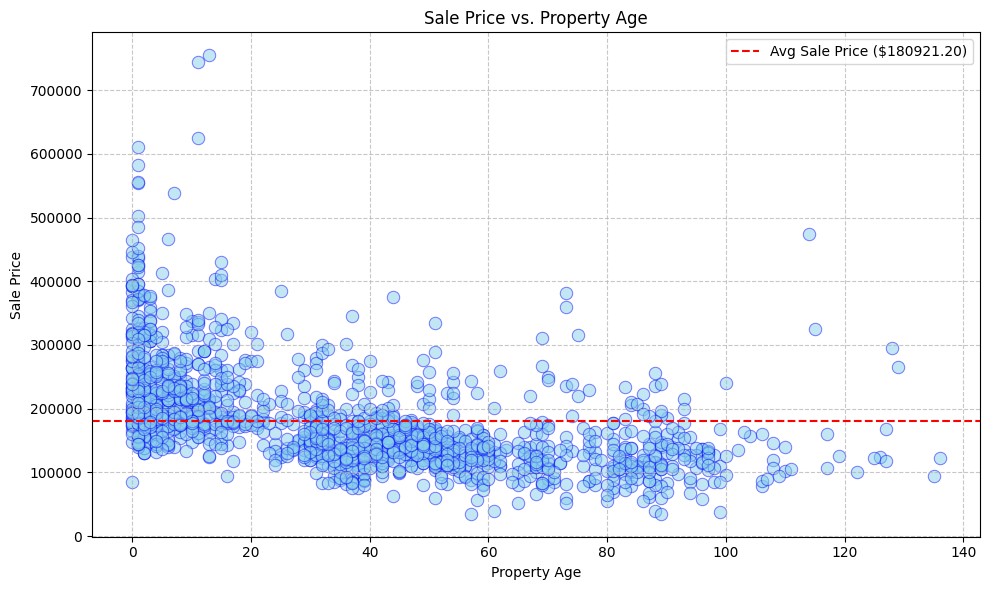

In [ ]:
df["PropertyAge"]=df["YrSold"]-df["YearBuilt"]
import seaborn as sns  # Import Seaborn for additional styling

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with customizations
sns.scatterplot(x=df["PropertyAge"], y=df["SalePrice"], alpha=0.5, color='skyblue', edgecolor='b', s=80)

# Adding labels and a title
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.title('Sale Price vs. Property Age')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Adding a horizontal line for average sale price
average_sale_price = df["SalePrice"].mean()
plt.axhline(y=average_sale_price, color='red', linestyle='--', label=f'Avg Sale Price (${average_sale_price:.2f})')

# Adding a legend
plt.legend()

# Optionally, you can set axis limits to zoom in on a specific range of data
# plt.xlim(1800, 2025)
# plt.ylim(0, 800000)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
Living_price=df.groupby("GrLivArea").agg({"SalePrice":"mean"})

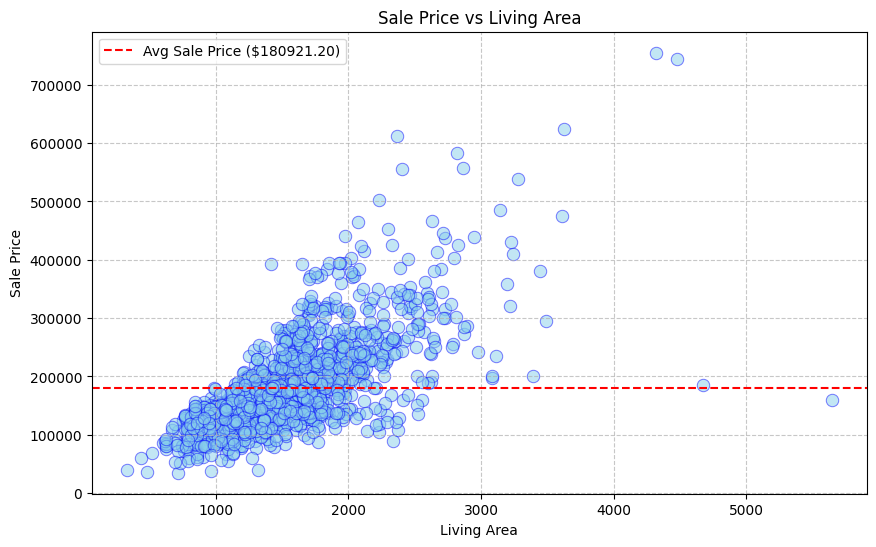

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot with customizations
sns.scatterplot(x=df["GrLivArea"], y=df["SalePrice"], alpha=0.5, color='skyblue', edgecolor='b', s=80)

# Adding labels and a title
plt.xlabel('Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Living Area')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Adding a horizontal line for average sale price
average_sale_price = df["SalePrice"].mean()
plt.axhline(y=average_sale_price, color='red', linestyle='--', label=f'Avg Sale Price (${average_sale_price:.2f})')

# Adding a legend
plt.legend()

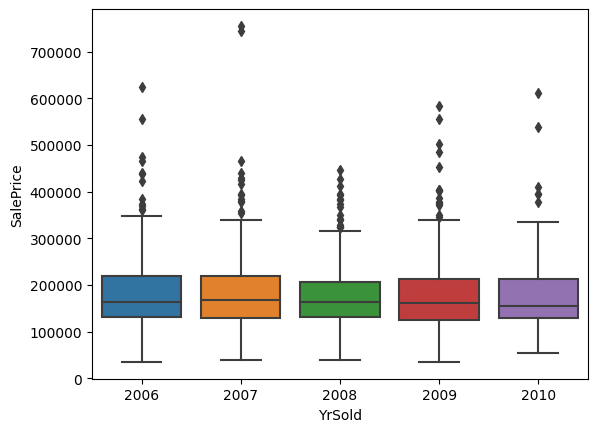

In [ ]:
sns.boxplot(x="YrSold",y="SalePrice",data=df);

''

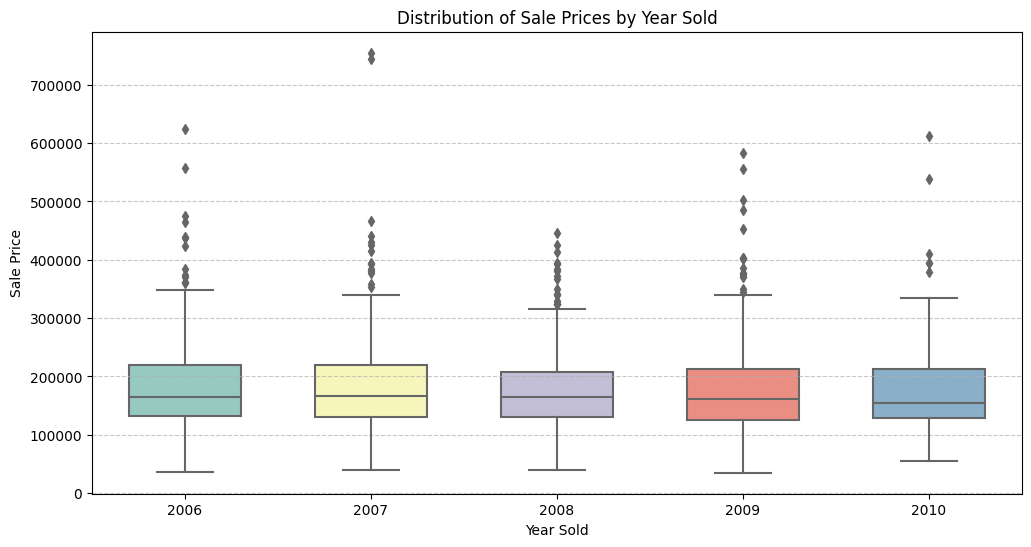

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot with customizations
sns.boxplot(x="YrSold", y="SalePrice", data=df, palette="Set3", width=0.6)

# Adding labels and a title
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.title('Distribution of Sale Prices by Year Sold')

# Customize the gridlines
ax.grid(True, linestyle='--', alpha=0.7, axis='y')

;



#Data Producers ----> Data Pipeline ------> Data Consumers
# (Databases,streaming data)-----> Data Pipeline ----> (For Data Analysis and Machine Learning)

###Why do this? - So we have consistent infrastructure for transforming the test set

###Goal - To create infrastructure that lets us make changes without breaking everything

#fit  the model ----> transform

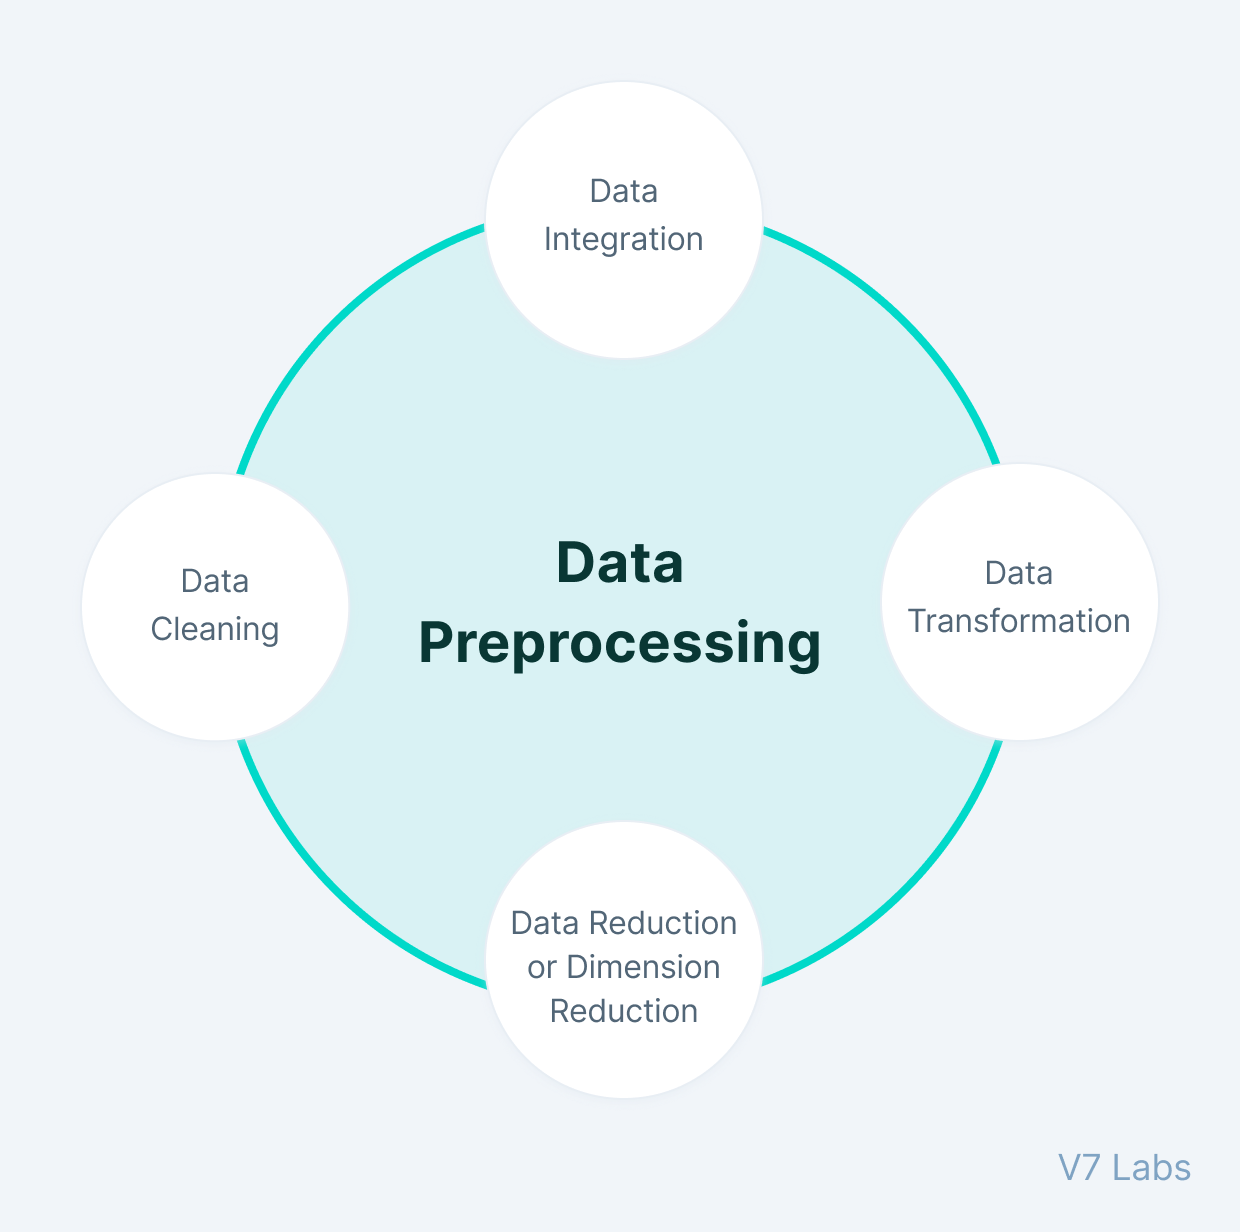

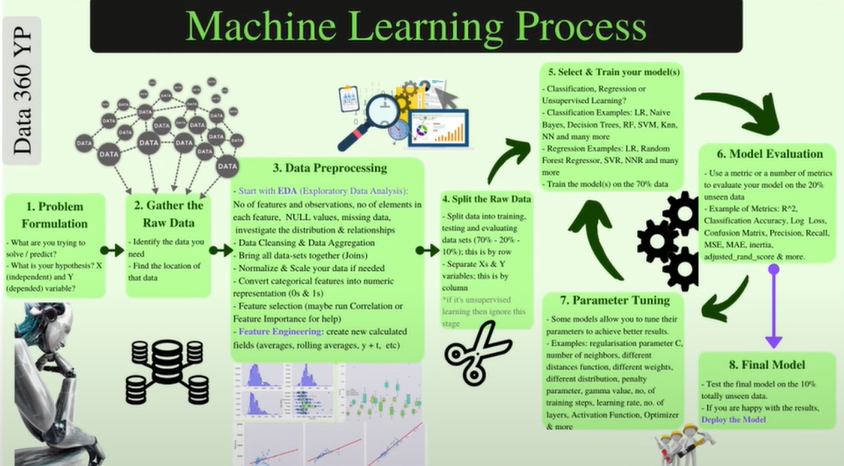

#Creating a Data Pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Define transformers for numerical and categorical columns
# Tranformers are used for natural language processing
numerical_transformer=Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
#imputer is basically  attributing and imputing a column would fill up any NaN values in the column (this is part of  preprocesing)
#standard scaller is used to normally distribute data and also a model learns better when you SCALE down all the feautures into a single measuring unit
categorical_transformer=Pipeline(steps=[("impute",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse=False))])

In [ ]:
#Seperating categorical and numerical columns
categorical_columns=df.select_dtypes(include=["object","category"]).columns
numerical_columns=df.select_dtypes(include=["int64","float64"]).columns
#remove dependent variable from numerical column
numerical_columns=numerical_columns.drop("SalePrice")

In [ ]:
#Combine transformers using ColumnTransformer
# ColumnTransformer is used to apply different preprocessing to different columns
preprocessor=ColumnTransformer(transformers=[("num",numerical_transformer,numerical_columns),("cat",categorical_transformer,categorical_columns)],remainder="passthrough")

In [ ]:
# create pipeline for preprocessor
pipeline=Pipeline(steps=[("preprocessor",preprocessor)])

In [ ]:
numerical_transformer

Pipeline(steps=[('impute', SimpleImputer()), ('scaler', StandardScaler())])

In [ ]:
categorical_transformer

Pipeline(steps=[('impute',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2...
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))]))])

In [ ]:
# Now apply the pipeline to your dataset
X=df.drop("SalePrice",axis=1)
y=np.log(df["SalePrice"]) # Normalize the dependent variable
X_preprocessed=pipeline.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_preprocessed
# now as we can see all numeric and cateogorical columns are transformed into a numpy array which will now make machine learning possible

array([[-1.73086488,  0.07337496, -0.22937175, ...,  0.        ,
         1.        ,  0.        ],
       [-1.7284922 , -0.87256276,  0.4519361 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.72611953,  0.07337496, -0.09311018, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.72611953,  0.30985939, -0.18395123, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.7284922 , -0.87256276, -0.09311018, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.73086488, -0.87256276,  0.22483348, ...,  0.        ,
         1.        ,  0.        ]])

#Fit and Parameter Tune models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [ ]:
# Split the data into train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

models={"LinearRegression":LinearRegression(),"RandomForest":RandomForestRegressor(random_state=42),"XGBoost":XGBRegressor(random_state=42)}

In [ ]:

cv=KFold(n_splits=3,shuffle=True,random_state=42)
#K-Folds cross-validator
#Provides train/test indices to split data in train/test sets. Split dataset into k consecutive folds (without shuffling by default).
#Each fold is then used once as a validation while the k - 1 remaining folds form the training set.vvvvv

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Hyperparameter tuning and model selection
for model_name,model in models.items():
  if model_name == "LinearRegression":
    # Linear Regression does not have hyperparameters to tune
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    params={}
  elif model_name == "RandomForest":
    param_grid={"n_estimators":[100,200,500],"max_depth":[None,10,30],"min_samples_split":[2,5,10]}
    grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer(means it will use all cores)
    grid_search.fit(X_train,y_train)
    model=grid_search.best_estimator_
    y_pred=model.predict(X_test)
    params=grid_search.best_params_
  else: #XGBoost
    param_grid={'n_estimators': [100, 200, 500],'learning_rate': [0.01, 0.1, 0.3],'max_depth': [3, 6, 10]}
    grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    grid_search.fit(X_train,y_train)
    model=grid_search.best_estimator_
    y_pred=model.predict(X_test)
    params=grid_search.best_params_

  rmse=sqrt(mean_squared_error(y_test,y_pred)) #Lowest RMSE is best model

  print(f"Model: {model}")
  print(f"Best Params: {params}")
  print(f"Best RMSE: {rmse}")


Model: LinearRegression()
Best Params: {}
Best RMSE: 510039408.5152164
Model: RandomForestRegressor(min_samples_split=5, n_estimators=500, random_state=42)
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE: 0.14695707764366517
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_sta

We can see that the RMSE for LinearRegression is horrible we will try to fix that later

We also see that XGBoost is the best model

#Activation Functions:

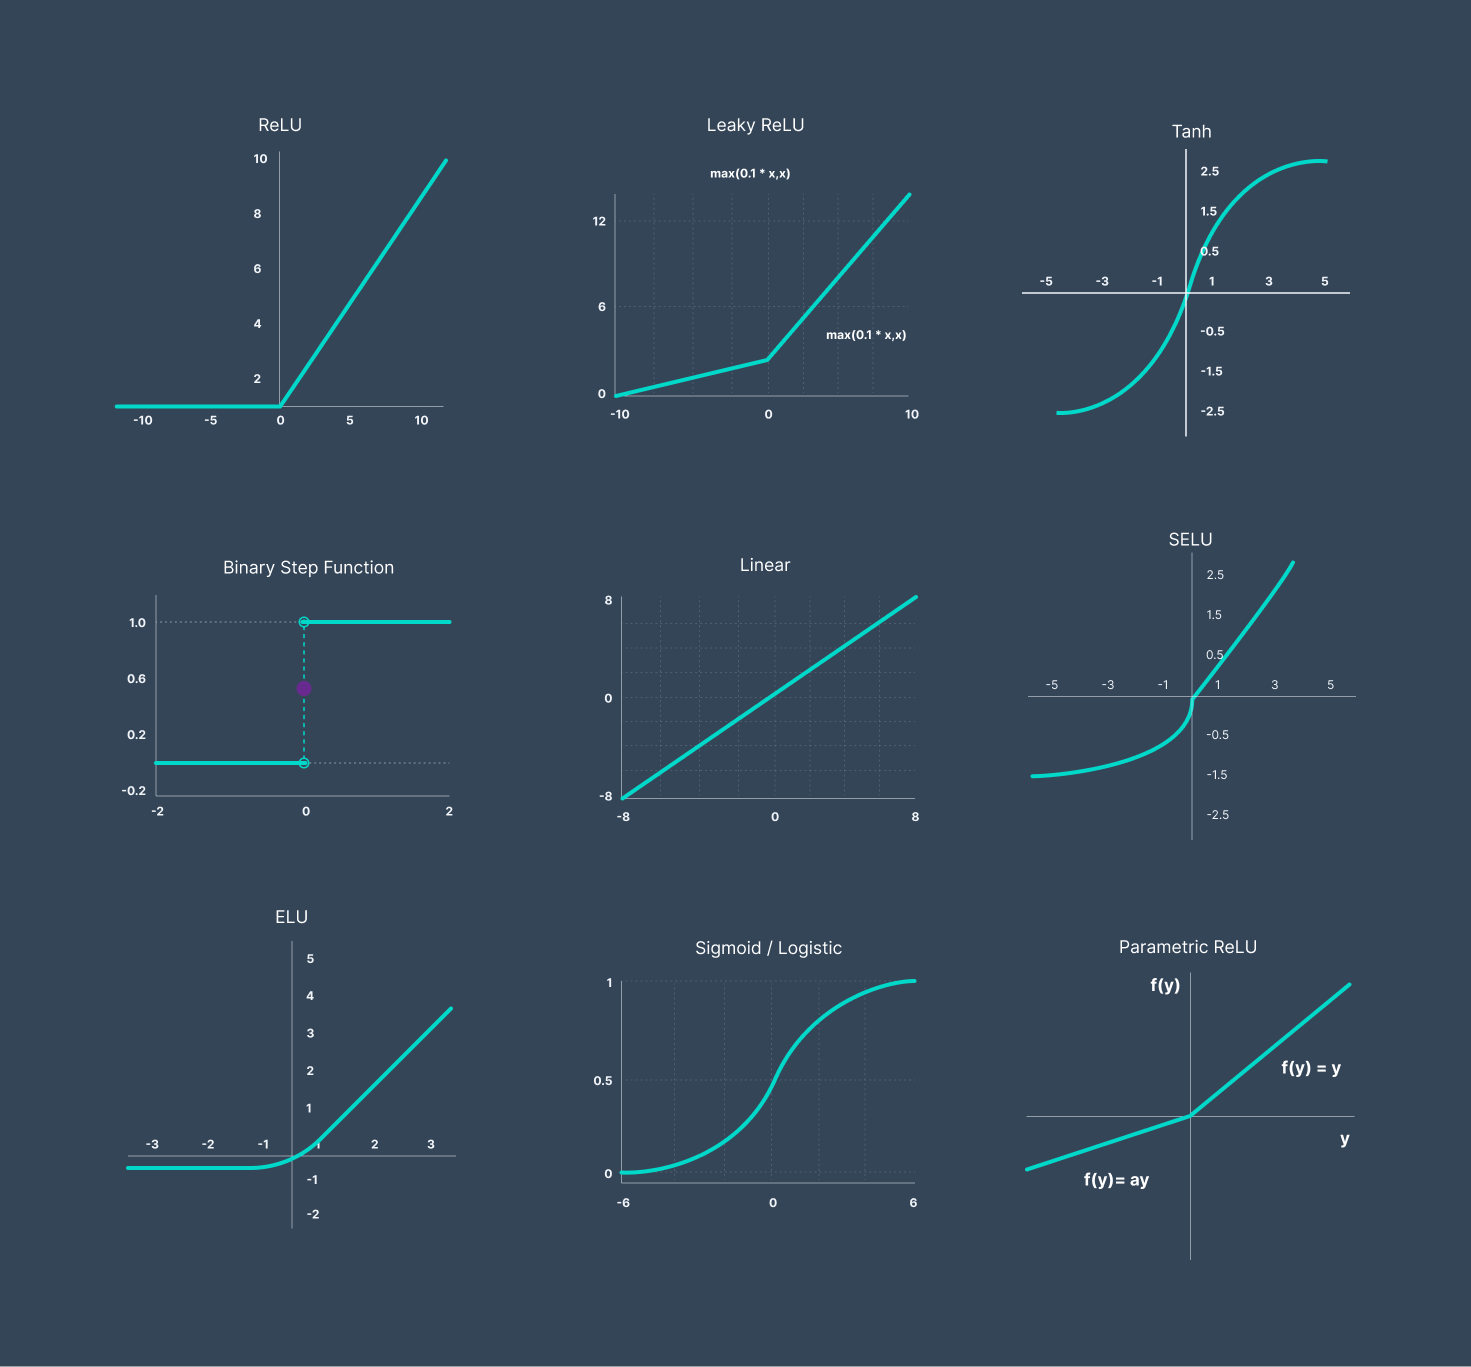

Activation function depends on derivative values

sigmoid is often used in logistics regression and squeezes input to an output between 0 and 1

###Vanishing Gradients:
However derivative of sigmoid gives very minimal values (eg:-0.0008)and during back propagation they are multiplied with the minimal values of gradients over and over until almost no data is passed thru(eg:- 0.00073 * 0.00064 = 4.672e-7)

###Asymmetric:
Another problem of sigmoid is that it is assymetric around 0, however this problem is solved using tanH.

L1: mae
L2: mse

In [ ]:
from sklearn.neural_network import MLPRegressor
#Create an MLPRegressor
mlp=MLPRegressor(random_state=42,max_iter=10000,n_iter_no_change=3,learning_rate_init=0.001)
#Create Parameter Grid
param_grid_mlp={"hidden_layer_sizes":[(10,),(10,10),(10,10,10),(25)],"activation":["relu","tanh"],"solver":["adam"],"learning_rate":['constant', 'invscaling', 'adaptive']}
#Fit all parameters using GridSearchCV
grid_search_mlp=GridSearchCV(mlp,param_grid_mlp,scoring="neg_mean_squared_error",cv=3,n_jobs=-1,verbose=1)
grid_search_mlp.fit(X_train,y_train)
model=grid_search_mlp.best_estimator_
params=grid_search_mlp.best_params_
score=np.sqrt(-1*grid_search_mlp.best_score_)
y_pred=model.predict(X_test)
RMSE=sqrt(mean_squared_error(y_test,y_pred))
print(f"Best Params: {params}")
print(f"Best RMSE: {RMSE}")
print(f"Best Score: {score}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best RMSE: 0.16456372948508952
Best Score: 0.23248885526714722


#Basic Feature Engineering

In [ ]:
# Simple test done to understand cumulative variance
# This cell has no significance on the project (<-- PLS READ)
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(0)
my_matrix = np.random.randn(20,20)

my_model = PCA(n_components=12) #no:of components to keep
my_model.fit_transform(my_matrix)

print(my_model.explained_variance_)
print(my_model.explained_variance_ratio_)
print(my_model.explained_variance_ratio_.cumsum())

[3.81420583 3.1068736  2.36032042 1.85199016 1.48877239 1.36632629
 1.22513244 1.00511589 0.86591263 0.67975715 0.47191014 0.41482245]
[0.19689957 0.16038518 0.12184609 0.09560472 0.07685444 0.07053344
 0.06324463 0.05188679 0.04470074 0.03509089 0.02436127 0.02141425]
[0.19689957 0.35728475 0.47913084 0.57473556 0.65159    0.72212344
 0.78536807 0.83725486 0.8819556  0.9170465  0.94140777 0.96282202]


In [ ]:
# we will try to improve the RMSE of LinearRegression using Principal component analysis
# The reason we got high RMSE for LinearRegression is because we fit so much data and a lot of the variables were highly correlated
# PCA can fix this by reducing linear dimensionality
from sklearn.decomposition import PCA
pca=PCA()
# pre fitting pca on X_preprocessed becaue we are not yet sure of n_components
X_pca_pre=pca.fit_transform(X_preprocessed)
# getting cumulative sum of explained_variance_ratio_ (an array that adds till 1. unless n_components is mentioned, check above cell)
cum_var=np.cumsum(pca.explained_variance_ratio_)
# determining n_components based on cum_var
n_component=np.argmax(cum_var>=0.95)+1
#now fitting proper PCA with no:of components
pca=PCA(n_components=n_component)
#make new pipeline with preprocessor and pca
pca_pipeline=Pipeline(steps=[("preprocessor",preprocessor),("pca",pca)])
X_pca=pca_pipeline.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Now run the same models on new data
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=42)

models={"LinearRegression":LinearRegression(),"RandomForest":RandomForestRegressor(random_state=42),"XGBoost":XGBRegressor(random_state=42)}

cv=KFold(n_splits=3,shuffle=True,random_state=42)

from sklearn.metrics import mean_squared_error
from math import sqrt
# Hyperparameter tuning and model selection
for model_name,model in models.items():
  if model_name == "LinearRegression":
    # Linear Regression does not have hyperparameters to tune
    model.fit(X_train_pca,y_train_pca)
    y_pred_pca=model.predict(X_test_pca)
    params={}
  elif model_name == "RandomForest":
    param_grid={"n_estimators":[100,200,500],"max_depth":[None,10,30],"min_samples_split":[2,5,10]}
    grid_search_pca=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer(means it will use all cores)
    grid_search_pca.fit(X_train_pca,y_train_pca)
    model=grid_search_pca.best_estimator_
    y_pred_pca=model.predict(X_test_pca)
    params=grid_search_pca.best_params_
  else: #XGBoost
    param_grid={'n_estimators': [100, 200, 500],'learning_rate': [0.01, 0.1, 0.3],'max_depth': [3, 6, 10]}
    grid_search_pca=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    grid_search_pca.fit(X_train_pca,y_train_pca)
    model=grid_search_pca.best_estimator_
    y_pred_pca=model.predict(X_test_pca)
    params=grid_search_pca.best_params_

  rmse=sqrt(mean_squared_error(y_test_pca,y_pred_pca)) #Lowest RMSE is best model

  print(f"Model: {model}")
  print(f"Best Params: {params}")
  print(f"Best RMSE: {rmse}")

Model: LinearRegression()
Best Params: {}
Best RMSE: 0.14442932707359188
Model: RandomForestRegressor(random_state=42)
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE: 0.15599919825456993
Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Best Params: {'learning_r

we can see that the LinearRegression has gotten so much better but the RandomForest and XGBoost have slightly increased

In [ ]:
# running new data on MLPRegressor

from sklearn.neural_network import MLPRegressor
#Create an MLPRegressor
mlp=MLPRegressor(random_state=42,max_iter=10000,n_iter_no_change=3,learning_rate_init=0.001)
#Create Parameter Grid
param_grid_mlp={"hidden_layer_sizes":[(10,),(10,10),(10,10,10),(25)],"activation":["relu","tanh"],"solver":["adam"],'alpha': [0.0001, 0.001, 0.01, .1, 1],
"learning_rate":['constant', 'invscaling', 'adaptive']}
#Fit all parameters using GridSearchCV
grid_search_mlp_pca=GridSearchCV(mlp,param_grid_mlp,scoring="neg_mean_squared_error",cv=3,n_jobs=-1,verbose=1)
grid_search_mlp_pca.fit(X_train_pca,y_train_pca)
model=grid_search_mlp_pca.best_estimator_
params=grid_search_mlp_pca.best_params_
score=np.sqrt(-1*grid_search_mlp_pca.best_score_)
y_pred=model.predict(X_test_pca)
RMSE=sqrt(mean_squared_error(y_test_pca,y_pred))
print(f"Best Params: {params}")
print(f"Best RMSE: {RMSE}")
print(f"Best Score: {score}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Params: {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best RMSE: 0.16199709083090194
Best Score: 0.21034035285022626


In [ ]:
from sklearn.preprocessing import FunctionTransformer
# Function transformer converts a function into a transformer
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)

    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


In [ ]:
# Identify categorical and numerical columns
new_cols_categorical=pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

#Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# train test split on new data
X_train_fe,X_test_fe,y_train_fe,y_test_fe=train_test_split(X_preprocessed_fe,y,test_size=0.2, random_state=42)

In [ ]:
models={"LinearRegression":LinearRegression(),"RandomForest":RandomForestRegressor(random_state=42),"XGBoost":XGBRegressor(random_state=42)}

param_grids={"LinearRegression":{},"RandomForest":{"n_estimators":[100,200,500],"max_depth":[None,10,30],"min_samples_split":[2,5,10]},
"XGBoost":{"n_estimator":[100,200,500],"max_depth":[3,6,10],"learning_rate":[0.01,0.1,0.3]}}

cv = KFold(n_splits=3, shuffle=True, random_state=42)
grids_fe={}

for model_name,model in models.items():
  if model_name == "LinearRegression":
    grids_fe[model_name]=GridSearchCV(model,param_grids[model_name],cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    grids_fe[model_name].fit(X_train_fe,y_train_fe)
    y_pred_fe=grids_fe[model_name].predict(X_test_fe)
  elif model_name == "RandomForest":
    grids_fe[model_name]=GridSearchCV(estimator=model,param_grid=param_grids[model_name],cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    grids_fe[model_name].fit(X_train_fe,y_train_fe)
    model=grids_fe[model_name].best_estimator_
    y_pred_fe=model.predict(X_test_fe)
    params=grids_fe[model_name].best_params_
  else:
    grids_fe[model_name]=GridSearchCV(model,param_grids[model_name],cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
    grids_fe[model_name].fit(X_train_fe,y_train_fe)
    model=grids_fe[model_name].best_estimator_
    y_pred_fe=model.predict(X_test_fe)
    params=grids_fe[model_name].best_params_

  rmse=sqrt(mean_squared_error(y_test_fe,y_pred_fe)) #Lowest RMSE is best model
  print(f"Model: {model}")
  print(f"Best Params: {params}")
  print(f"Best RMSE: {rmse}")

Model: LinearRegression()
Best Params: {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Best RMSE: 0.14294518161547012
Model: RandomForestRegressor(min_samples_split=5, n_estimators=500, random_state=42)
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE: 0.1524290558916089


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [08:27:11] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimator" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimator=100, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)
Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimator': 100}
Best RMSE: 0.14756711916978899


In [ ]:
from sklearn.neural_network import MLPRegressor
#Create an MLPRegressor
mlp=MLPRegressor(random_state=42,max_iter=10000,n_iter_no_change=3,learning_rate_init=0.001)
#Create Parameter Grid
param_grid_mlp={"hidden_layer_sizes":[(10,),(10,10),(10,10,10),(25)],"activation":["relu","tanh","sigmoid"],"solver":["adam"],'alpha': [.1, .5, 1, 10, 100],
"learning_rate":['constant', 'invscaling', 'adaptive'],'learning_rate_init' : [0.1]}
#Fit all parameters using GridSearchCV
grid_search_mlp_fe=GridSearchCV(mlp,param_grid_mlp,scoring="neg_mean_squared_error",cv=3,n_jobs=-1,verbose=1)
grid_search_mlp_fe.fit(X_train_fe,y_train_fe)
model=grid_search_mlp_fe.best_estimator_
params=grid_search_mlp_fe.best_params_
score=np.sqrt(-1*grid_search_mlp_fe.best_score_)
y_pred_fe=model.predict(X_test_fe)
RMSE=sqrt(mean_squared_error(y_test_fe,y_pred_fe))
print(f"Best Params: {params}")
print(f"Best RMSE: {RMSE}")
print(f"Best Score: {score}")

Fitting 3 folds for each of 180 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dis

Best Params: {'activation': 'tanh', 'alpha': 0.5, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'solver': 'adam'}
Best RMSE: 0.14136253458709383
Best Score: 0.13496616842302556


In [ ]:
# ttrying out all our models on test data
df_test = pd.read_csv('/content/drive/MyDrive/data/test.csv')

In [ ]:
# pre processing data
df_test_preprocessed = pipeline_fe.transform(df_test)
#now data is preprocessed and ready to go into the models

In [ ]:
# XGboost
y_xgboost_pred=np.exp(grids_fe["XGBoost"].predict(df_test_preprocessed)) # we are not using best_estimator here because in some cases you cannot trust best_estimator_
# taking np.exp to undo the normalizing(log) we did on SalePrice before
# taking exponent will undo the log and give readable data
df_xgboost=df_test[["Id"]].copy() # requires ID for submission
df_xgboost["SalePrice"]=y_xgboost_pred

df_xgboost.to_csv("submission_xgboost.csv",index=False)

In [ ]:
# RandomForest
y_rf_pred=np.exp(grids_fe["RandomForest"].predict(df_test_preprocessed))
df_rf=df_test[["Id"]].copy()
df_rf["SalePrice"]=y_rf_pred
df_rf.to_csv("submission_randomforest.csv",index=False)

In [ ]:
# MLP
y_mlp_pred=np.exp(model.predict(df_test_preprocessed))
df_mlp=df_test[["Id"]].copy()
df_mlp["SalePrice"]=y_mlp_pred
df_mlp.to_csv("submission_mlp.csv",index=False)

In [ ]:
# ensemble (average of three models)
y_ens_pred=(y_xgboost_pred + y_rf_pred + y_mlp_pred)/3
df_ens=df_test[["Id"]].copy()
df_ens["SalePrice"]=y_ens_pred
df_ens.to_csv("submission_ensemble.csv",index=False)